# 11 - Potholes

Starting to investigate data that might help answer questions.

**GitHub Discussion Issue**: https://github.com/DataManagementYEG/Sandbox/issues/11


In [29]:
# standard
import pandas as pd
import numpy as np

# used for plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
%matplotlib inline

In [2]:
# Adding all of the file names into an array
files = ["11_Potholes_Filled.csv", "11_Risk_Management_-_Pothole_Payout_Claims.csv"]

# Creating a dictionary by reading all of the data files under data folder
data = {}
for f in files:
    d = pd.read_csv("../data/{0}".format(f))
    data[f.replace(".csv","")] = d

In [3]:
# Printing first 5 lines of each DataFrame
plotdata = 
    print("\n============\n" + k + "\n============")
    print(v.head())


11_Potholes_Filled
   ID                DateTime REPORT_MONTH  REPORT_YEAR REPORT_PERIOD  \
0   1  01/31/2007 12:00:00 AM      January         2007        Jan-07   
1   2  02/28/2007 12:00:00 AM     February         2007        Feb-07   
2   3  03/31/2007 12:00:00 AM        March         2007        Mar-07   
3   4  04/30/2007 12:00:00 AM        April         2007        Apr-07   
4   5  05/31/2007 12:00:00 AM          May         2007        May-07   

   NUMBER_FILLED  YTD_FILLED  
0          14400       14400  
1          11500       25900  
2          61800       87700  
3          37450      125150  
4          94500      219650  

11_Risk_Management_-_Pothole_Payout_Claims
   Year       Month  Total Number of Claims Reported  \
0   2010   January                                 6   
1   2010  February                                 3   
2   2010      March                               16   
3   2010     April                                13   
4   2010        May            

In [7]:
# Printing all of the columns
for k,v in data.items():
    print("\n============\n" + k + "\n============")
    print(v.shape)
    print(v.columns)    
    print(v.sample(10))


11_Potholes_Filled
(123, 7)
Index(['ID', 'DateTime', 'REPORT_MONTH', 'REPORT_YEAR', 'REPORT_PERIOD',
       'NUMBER_FILLED', 'YTD_FILLED'],
      dtype='object')
      ID                DateTime REPORT_MONTH  REPORT_YEAR REPORT_PERIOD  \
57    58  10/31/2011 12:00:00 AM      October         2011        Oct-11   
77    78  06/30/2013 12:00:00 AM         June         2013        Jun-13   
111  114  04/30/2016 12:00:00 AM        April         2016      Apr-2016   
102  105  07/31/2015 12:00:00 AM         July         2015      Jul-2015   
74    75  03/31/2013 12:00:00 AM        March         2013        Mar-13   
32    33  09/30/2009 12:00:00 AM    September         2009        Sep-09   
1      2  02/28/2007 12:00:00 AM     February         2007        Feb-07   
118  121  11/30/2016 12:00:00 AM     November         2016      Nov-2016   
81    84  11/30/2013 12:00:00 AM     November         2013        Nov-13   
22    23  11/30/2008 12:00:00 AM     November         2008        Nov-08   



## CheckPoint
20170508 RK - neither dataset is detailed.  Data can be joined by Year/Month - but should there be a lag?

Q: Are claims the month paid or month reported?  If reported, then the fill count should be higher in months after?



## Simple Plots

### Time Series - Payouts

In [48]:
# Plot df & data
plot_df = data["11_Risk_Management_-_Pothole_Payout_Claims"]
plot_data = plot_df['Total Amount Paid ($)']

print(plot_data.head())


0      0.00
1    401.02
2    998.97
3    368.00
4    387.00
Name: Total Amount Paid ($), dtype: float64


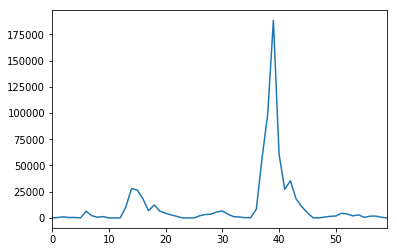

In [44]:
plot_data.plot()

In [32]:
years    = mdates.YearLocator()   # every year
months   = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# 
datafile = plot_data
r = np.load(datafile).view(np.recarray)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(r.date, r.adj_close)


# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(r.date.min().year, 1, 1)
datemax = datetime.date(r.date.max().year+1, 1, 1)
ax.set_xlim(datemin, datemax)

# format the coords message box
def price(x): return '$%1.2f'%x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

AttributeError: 'Series' object has no attribute 'read'

0          0.00
1        401.02
2        998.97
3        368.00
4        387.00
5          0.00
6       6353.91
7       2118.40
8        607.00
9       1283.90
10         0.00
11         0.00
12         0.00
13     10447.05
14     27847.77
15     26723.26
16     18313.96
17      6791.20
18     12408.20
19      6386.00
20      4422.73
21      2821.56
22      1431.35
23         0.00
24         0.00
25         0.00
26      2048.97
27      3270.97
28      3543.12
29      5562.81
30      6641.88
31      3510.61
32      1183.88
33       900.00
34       216.77
35       137.02
36      8432.86
37     56846.28
38     98843.77
39    188478.01
40     60751.46
41     27323.44
42     35398.90
43     18115.39
44     10784.23
45      4815.02
46       144.08
47         0.00
48       753.55
49      1494.63
50      1810.69
51      4420.61
52      3779.56
53      1951.79
54      2923.33
55       564.58
56      1642.86
57      1799.10
58       631.75
59         0.00
Name: Total Amount Paid ($), dtype: floa

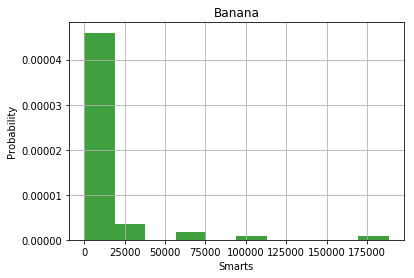

In [27]:
# Histogram of Payouts
plot_df = data["11_Risk_Management_-_Pothole_Payout_Claims"]
plot_data = plot_df['Total Amount Paid ($)']

# the histogram of the data
plt.hist(plot_data, 10, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Banana')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()


## Exploring English language learners and SAT scores

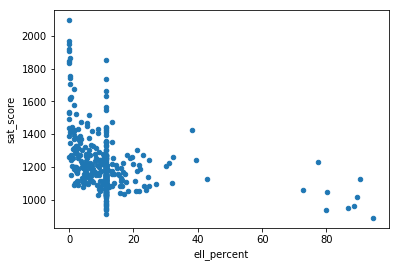

In [68]:
full.plot.scatter(x='ell_percent', y='sat_score')

## Correlating survey scores and SAT scores

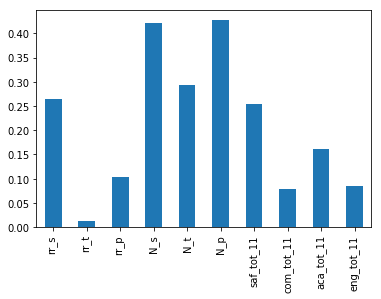

In [69]:
full.corr()["sat_score"][["rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_tot_11", "com_tot_11", "aca_tot_11", "eng_tot_11"]].plot.bar()

## Exploring race and SAT scores

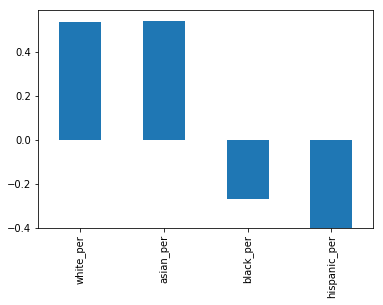

In [70]:
full.corr()["sat_score"][["white_per", "asian_per", "black_per", "hispanic_per"]].plot.bar()

## Gender differences in SAT scores

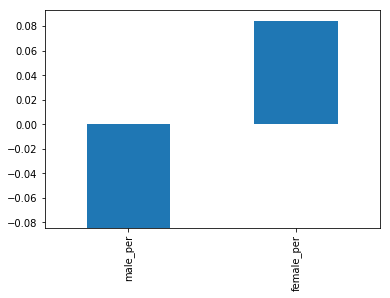

In [71]:
full.corr()['sat_score'][['male_per','female_per']].plot.bar()

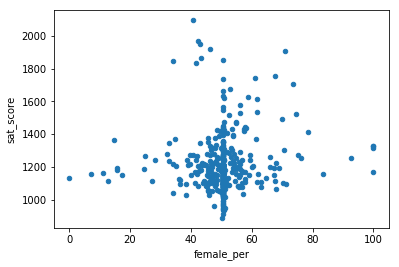

In [72]:
full[full['sat_score'] > 0].plot.scatter(x='female_per',y='sat_score')

In [73]:
full[(full['sat_score'] > 1400) & (full['female_per'] > 65)]['school_name']

10              Professional Performing Arts High School
14                         Eleanor Roosevelt High School
22                          Talent Unlimited High School
35     Fiorello H. LaGuardia High School of Music & A...
185                          Townsend Harris High School
212         Frank Sinatra School of the Arts High School
Name: school_name, dtype: object

## AP scores

In [74]:
full['ap_avg'] = full['AP Test Takers '] / full['total_enrollment']

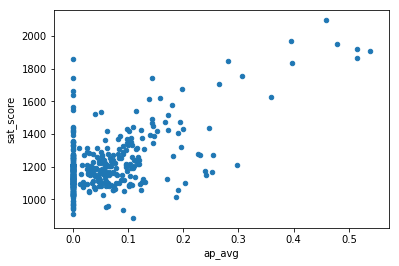

In [75]:
full.plot.scatter(x='ap_avg', y='sat_score')

# Still Working on this
there are mapping options and other datasets to include as well, like attendance

**bold**
- sdf
-dsf 

sd-sd 
